<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


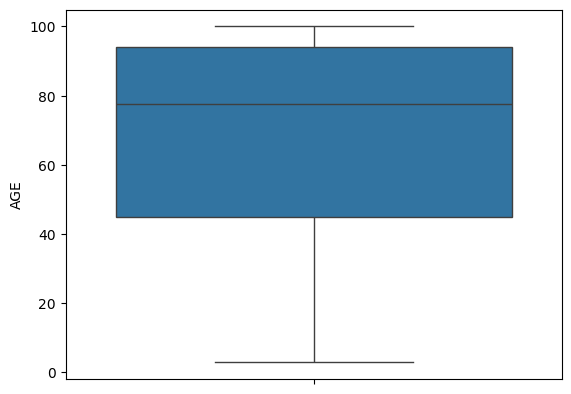

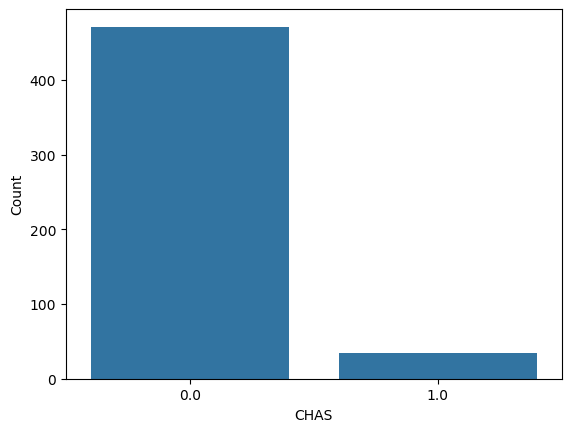

<bound method _AxesBase.clear of <AxesSubplot:xlabel='CHAS', ylabel='Count'>>

In [6]:
# --- For the "Median value of owner-occupied homes" provide a boxplot ---
ax = sns.boxplot(y='AGE', data=boston_df)
pyplot.show()
ax.clear

# --- Provide a bar plot for the Charles river variable ---
boston_df['Count'] = 1
chas_df = boston_df.groupby('CHAS').count()
ax = sns.barplot(x='CHAS', y='Count', data=chas_df)
pyplot.show()
ax.clear

--- For the 'Median value of owner-occupied homes' provide a boxplot ---


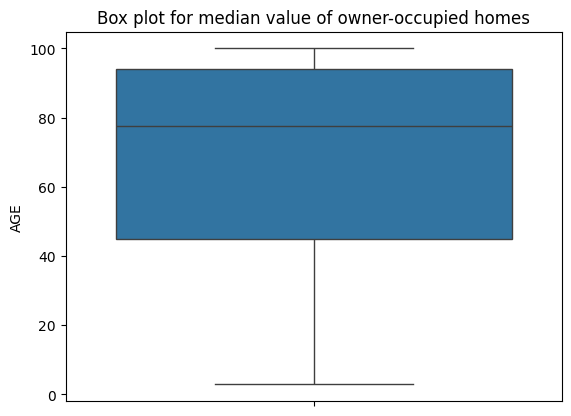

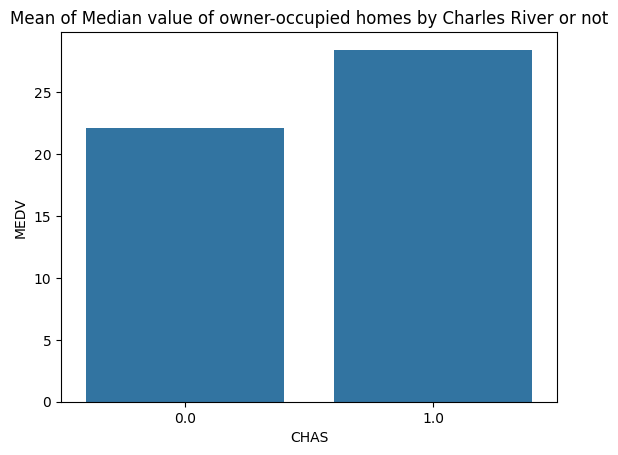

---  ---


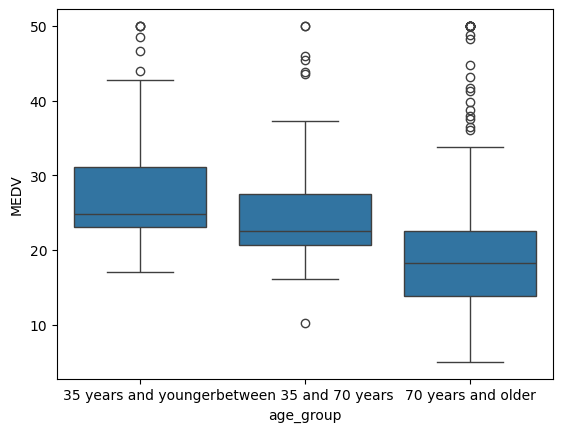

---  ---


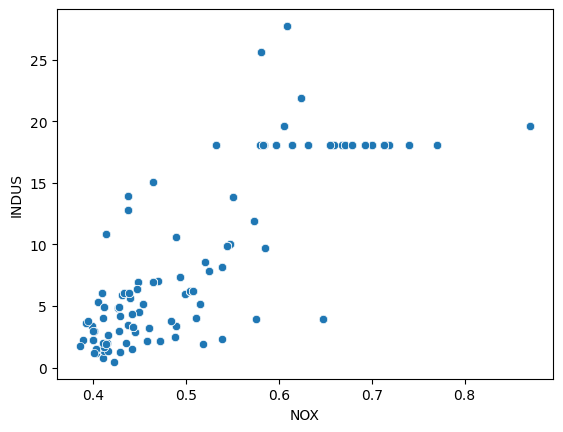

Conclusion: Nitrix oxide concentration has a strong positive relationship with proportion of non-retail business acres per town.


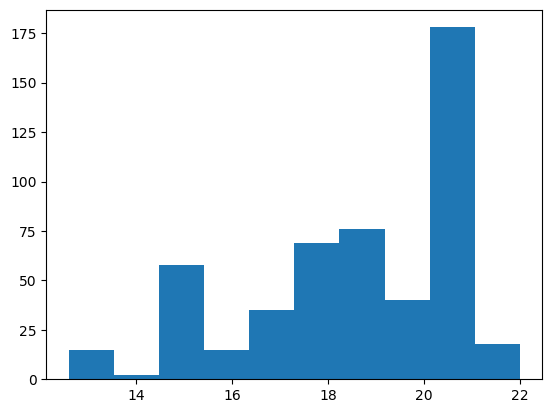

---------------------------------------------------------------------------
Question: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
    t-test for means of price are the same between if close to Charles river
    TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)
    Conclusion: Since p-value < 0.05, we reject the null hypothesis of the means are the same.
---------------------------------------------------------------------------
Question: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
    ANOVA P-Value: 1.7105011022702984e-15
    Conclusion: Since p-value is < 0.05, the means of Median values are not the same
---------------------------------------------------------------------------
Question: Can we conclude that there is no relationship between Nitric oxide concentrations and propor

In [7]:

# --- For the "Median value of owner-occupied homes" provide a boxplot ---
print("--- For the 'Median value of owner-occupied homes' provide a boxplot ---")
ax1 = sns.boxplot(y='AGE', data=boston_df)
pyplot.title('Box plot for median value of owner-occupied homes')
pyplot.show()

# --- Provide a bar plot for the Charles river variable ---
boston_df['Count'] = 1
chas_df = boston_df.groupby('CHAS').mean()
ax2 = sns.barplot(x='CHAS', y='MEDV', data=chas_df)
pyplot.title('Mean of Median value of owner-occupied homes by Charles River or not')
pyplot.show()

# --- Provide a boxplot for the MEDV variable vs the AGE variable. 
# (Discretize the age variable into three groups of 35 years and younger, 
# between 35 and 70 years and 70 years and older) ---
print("---  ---")
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'
order = ['35 years and younger','between 35 and 70 years','70 years and older']

ax3 = sns.boxplot(y='MEDV', x='age_group', data=boston_df, order=order)
pyplot.show()

# --- Provide a scatter plot to show the relationship between Nitric oxide
# concentrations and the proportion of non-retail business acres per town. 
# What can you say about the relationship? ---
print("---  ---")
ax4 = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
pyplot.show()

print("Conclusion: Nitrix oxide concentration has a strong positive relationship with proportion of non-retail business acres per town.")

# --- Create a histogram for the pupil to teacher ratio variable ---
pyplot.hist(boston_df['PTRATIO'])
pyplot.show()

print("---------------------------------------------------------------------------")
print("Question: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)")
# t-test for variance
print("    t-test for means of price are the same between if close to Charles river")
print("   ",
    scipy.stats.ttest_ind(
        boston_df[boston_df['CHAS'] == 0]['MEDV'],
        boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = True))
print("    Conclusion: Since p-value < 0.05, we reject the null hypothesis of the means are the same.")

print("---------------------------------------------------------------------------")
print("Question: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)")
	
thirdyfive_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thridyfive_to_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

f_statistic, p_value = scipy.stats.f_oneway(thirdyfive_lower, thridyfive_to_seventy, seventy_older)
print("    ANOVA P-Value: {0}".format(p_value))
print("    Conclusion: Since p-value is < 0.05, the means of Median values are not the same")

print("---------------------------------------------------------------------------")
print("Question: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)")
print("    Running Pearson correlation...")
print("    ",scipy.stats.pearsonr(boston_df['NOX'], boston_df['MEDV']))
print("    Conclusion: Since p-value is < 0.05, there is a relationship between Nitric oxide concentration and propertion of non-retail business acres per town.")

print("---------------------------------------------------------------------------")
print("Question: What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)")
print("    Running Regression analysis...")
X = boston_df['DIS']
y = boston_df['MEDV']

## add an intercept (beta_0) to our model
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
print(model.summary())
print("    Conclusion: Since p-value is < 0.05, there is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.")
